In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from inspect import ClassFoundException

In [46]:
!pip install wolta

In [47]:
df = pd.read_csv('/content/drive/MyDrive/DIABETOR LASTT/diabetes_data_BRFSS2015.csv')
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
2,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
3,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
4,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79949,0.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,3.0,0.0,1.0,6.0,2.0,4.0
79950,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
79951,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
79952,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79954 entries, 0 to 79953
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          79954 non-null  float64
 1   HighBP                79954 non-null  float64
 2   HighChol              79954 non-null  float64
 3   CholCheck             79954 non-null  float64
 4   BMI                   79954 non-null  float64
 5   Smoker                79954 non-null  float64
 6   Stroke                79954 non-null  float64
 7   HeartDiseaseorAttack  79954 non-null  float64
 8   PhysActivity          79954 non-null  float64
 9   Fruits                79954 non-null  float64
 10  Veggies               79954 non-null  float64
 11  HvyAlcoholConsump     79954 non-null  float64
 12  AnyHealthcare         79954 non-null  float64
 13  NoDocbcCost           79954 non-null  float64
 14  GenHlth               79954 non-null  float64
 15  MentHlth           

In [49]:
print("Data Shape = ", df.shape)

Data Shape =  (79954, 22)


In [50]:
df.Diabetes_012.value_counts()

,count
Diabetes_012,
0.0,39977
2.0,35346
1.0,4631


In [51]:
df.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [52]:
df.duplicated().sum()

2004

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df.duplicated().sum()

0

In [55]:
correlation_matrix = df.corr()
correlation_matrix

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.360063,0.274715,0.118866,0.277441,0.074310,0.120935,0.203045,-0.148568,-0.048010,...,0.030308,0.035432,0.387349,0.084451,0.205721,0.260140,0.044214,0.265544,-0.153668,-0.208059
HighBP,0.360063,1.000000,0.301524,0.112792,0.225293,0.077968,0.125371,0.201278,-0.123852,-0.033459,...,0.038209,0.019568,0.304884,0.060318,0.166198,0.228867,0.037305,0.329625,-0.135064,-0.176688
HighChol,0.274715,0.301524,1.000000,0.094039,0.113882,0.087284,0.090203,0.173549,-0.076976,-0.041182,...,0.036585,0.023687,0.218238,0.079128,0.133545,0.154759,0.015949,0.235417,-0.073412,-0.096357
CholCheck,0.118866,0.112792,0.094039,1.000000,0.053538,0.002761,0.023391,0.045402,-0.010911,0.010671,...,0.116018,-0.051716,0.071694,-0.003207,0.039275,0.049686,-0.014362,0.100982,-0.016449,-0.006636
BMI,0.277441,0.225293,0.113882,0.053538,1.000000,0.000534,0.019698,0.050950,-0.158005,-0.082058,...,-0.011346,0.058097,0.252698,0.103068,0.151402,0.234007,-0.005687,-0.050369,-0.092521,-0.111942
Smoker,0.074310,0.077968,0.087284,0.002761,0.000534,1.000000,0.059239,0.120873,-0.068904,-0.065772,...,-0.013564,0.033261,0.139770,0.087284,0.111062,0.110512,0.116641,0.096596,-0.130322,-0.094572
Stroke,0.120935,0.125371,0.090203,0.023391,0.019698,0.059239,1.000000,0.218723,-0.074810,-0.010728,...,0.006501,0.033224,0.184786,0.081586,0.158107,0.183920,0.000999,0.120762,-0.069560,-0.130843
HeartDiseaseorAttack,0.203045,0.201278,0.173549,0.045402,0.050950,0.120873,0.218723,1.000000,-0.089109,-0.016816,...,0.020911,0.032826,0.267808,0.074225,0.192807,0.228952,0.099494,0.221021,-0.094603,-0.142572
PhysActivity,-0.148568,-0.123852,-0.076976,-0.010911,-0.158005,-0.068904,-0.074810,-0.089109,1.000000,0.131775,...,0.026221,-0.056579,-0.262353,-0.125856,-0.225834,-0.263594,0.048705,-0.092480,0.178588,0.185962
Fruits,-0.048010,-0.033459,-0.041182,0.010671,-0.082058,-0.065772,-0.010728,-0.016816,0.131775,1.000000,...,0.029152,-0.041837,-0.086606,-0.060682,-0.041150,-0.045811,-0.087170,0.069340,0.089493,0.065206


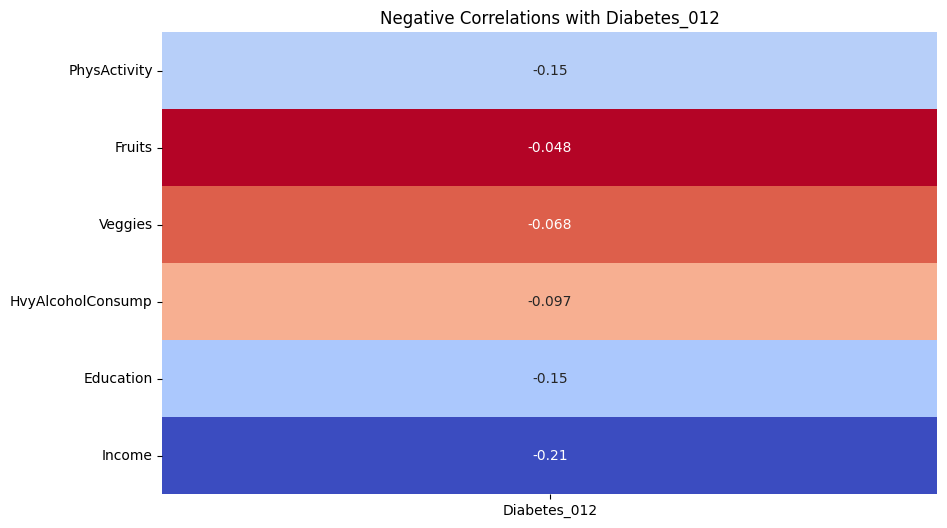

In [56]:
negative_corr = correlation_matrix['Diabetes_012'][correlation_matrix['Diabetes_012'] < 0]

# Create a heatmap for negative correlations
plt.figure(figsize=(10, 6))
sns.heatmap(negative_corr.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Negative Correlations with Diabetes_012")
plt.show()

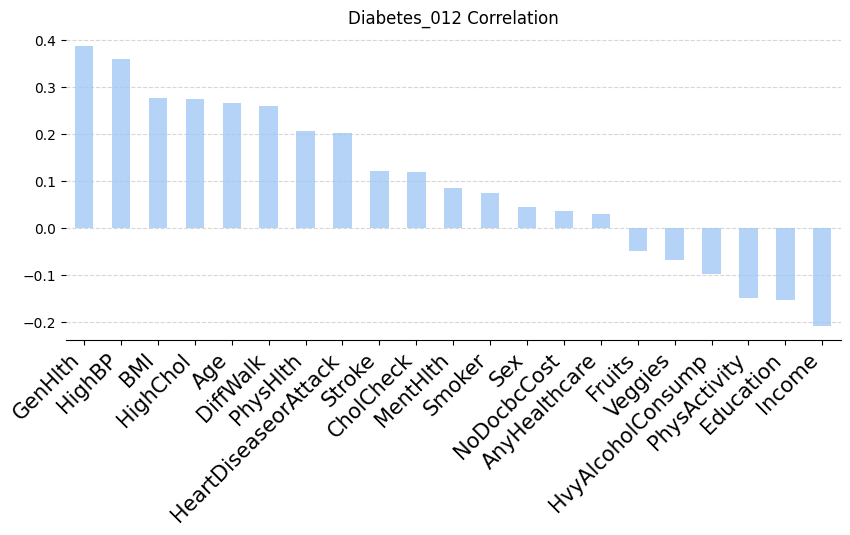

In [57]:
(df.corrwith(df.Diabetes_012)
  .drop('Diabetes_012')
  .sort_values(ascending=False)
  .plot(kind='bar', figsize=(10, 4), title="Diabetes_012 Correlation", alpha=0.8, zorder=3)
  .spines[['top','right', 'left']].set_visible(False)
)
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15);

In [58]:
columns_to_drop = negative_corr.index.tolist()

# Drop these columns from the dataset
df= df.drop(columns=columns_to_drop)

# Display the remaining columns
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age'],
      dtype='object')

In [59]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0
2,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0
3,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0
4,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79949,0.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,6.0
79950,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0
79951,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0
79952,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


In [60]:
from wolta.data_tools import col_types

types = col_types(df, print_columns=True)

Diabetes_012: float64
HighBP: float64
HighChol: float64
CholCheck: float64
BMI: float64
Smoker: float64
Stroke: float64
HeartDiseaseorAttack: float64
AnyHealthcare: float64
NoDocbcCost: float64
GenHlth: float64
MentHlth: float64
PhysHlth: float64
DiffWalk: float64
Sex: float64
Age: float64


In [61]:
from wolta.data_tools import seek_null

seeked = seek_null(df, print_columns=True)

In [62]:
from wolta.data_tools import unique_amounts

unique_amounts(df)

{'Diabetes_012': 3,
 'HighBP': 2,
 'HighChol': 2,
 'CholCheck': 2,
 'BMI': 80,
 'Smoker': 2,
 'Stroke': 2,
 'HeartDiseaseorAttack': 2,
 'AnyHealthcare': 2,
 'NoDocbcCost': 2,
 'GenHlth': 5,
 'MentHlth': 31,
 'PhysHlth': 31,
 'DiffWalk': 2,
 'Sex': 2,
 'Age': 13}

In [63]:
from wolta.data_tools import list_deletings

df = list_deletings(df)

The maximum tolerated null value amount is 15590
The maximum tolerated unique value amount is 7795 in string data


In [64]:
from wolta.data_tools import stat_sum

stat_sum(df,
        ['max', 'min', 'width', 'var', 'med'])

Diabetes_012
max: 2.0
min: 0.0
width: 2.0
variance: 0.9390065293248536
median: 1.0
***
HighBP
max: 1.0
min: 0.0
width: 1.0
variance: 0.24584103245406977
median: 1.0
***
HighChol
max: 1.0
min: 0.0
width: 1.0
variance: 0.24921571260997316
median: 1.0
***
CholCheck
max: 1.0
min: 0.0
width: 1.0
variance: 0.02586243776437669
median: 1.0
***
BMI
max: 98.0
min: 12.0
width: 86.0
variance: 51.07961484578566
median: 29.0
***
Smoker
max: 1.0
min: 0.0
width: 1.0
variance: 0.2496040946627437
median: 0.0
***
Stroke
max: 1.0
min: 0.0
width: 1.0
variance: 0.05776359428442356
median: 0.0
***
HeartDiseaseorAttack
max: 1.0
min: 0.0
width: 1.0
variance: 0.12496812869551338
median: 0.0
***
AnyHealthcare
max: 1.0
min: 0.0
width: 1.0
variance: 0.04564264950024296
median: 1.0
***
NoDocbcCost
max: 1.0
min: 0.0
width: 1.0
variance: 0.0879304901375489
median: 0.0
***
GenHlth
max: 5.0
min: 1.0
width: 4.0
variance: 1.216931535938771
median: 3.0
***
MentHlth
max: 30.0
min: 0.0
width: 30.0
variance: 66.7125128308347

In [65]:
df.Diabetes_012.value_counts()

,count
Diabetes_012,
0.0,38224
2.0,35097
1.0,4629


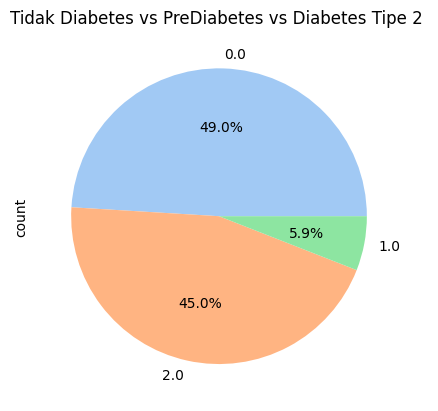

In [66]:
sns.set_palette('pastel')
df['Diabetes_012'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Tidak Diabetes vs PreDiabetes vs Diabetes Tipe 2 ')
plt.show()

In [67]:
df.isnull().sum().sum()

0

In [68]:
unique_value_count = {}

for i in df.columns:
    unique_value_count[i] =  df[i].nunique()

pd.DataFrame(unique_value_count , index=['unique value count']).T

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
AnyHealthcare,2
NoDocbcCost,2


<ipython-input-69-15436284479a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Diabetes_012', palette='rocket')


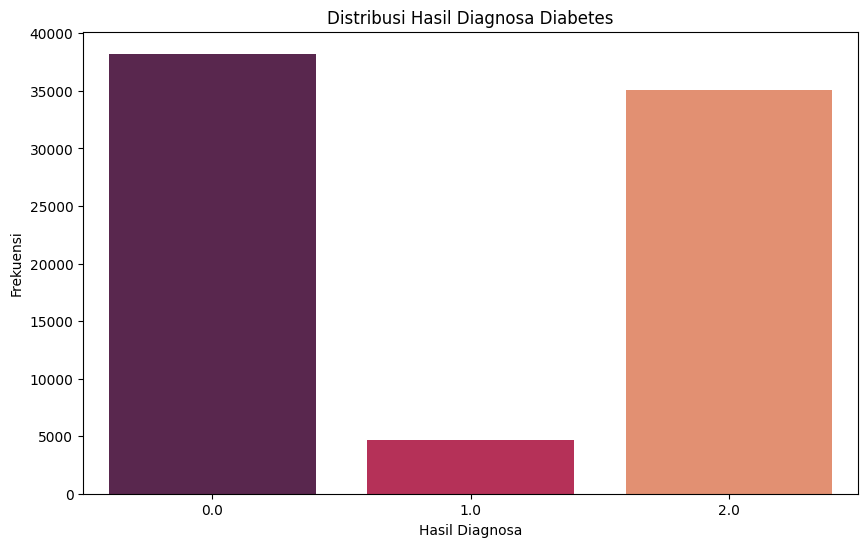

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Diabetes_012', palette='rocket')

plt.title('Distribusi Hasil Diagnosa Diabetes')
plt.xlabel('Hasil Diagnosa')
plt.ylabel('Frekuensi')
plt.show()

In [70]:
binary_columns = df.columns[(df.nunique() == 2)].tolist()
binary_columns

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex']

In [71]:
df[binary_columns] = df[binary_columns].astype(int)

In [72]:
def visualize_feature(feature_name, df_cleaned):
    fig, axes = plt.subplots(3, 1, figsize=(6, 18))  # Create a 3x1 grid of subplots

    # Pie chart
    df_cleaned[feature_name].value_counts().plot(kind='pie', autopct='%.02f', ax=axes[0])
    axes[0].set_title(f'{feature_name}')

    # Crosstab heatmap
    cross_tab = pd.crosstab(df_cleaned[feature_name], df_cleaned['Diabetes_012'], normalize='index')
    sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='0.2%', cbar=False, ax=axes[1])
    axes[1].set_title(f'Cross-Tabulation: {feature_name} vs Diabetes_012 (%)')

    # Crosstab bar plot
    cross_tab.plot(kind='bar', ax=axes[2])
    axes[2].set_title(f'Bar Plot: {feature_name} vs Diabetes_012')

    plt.tight_layout()
    plt.show()

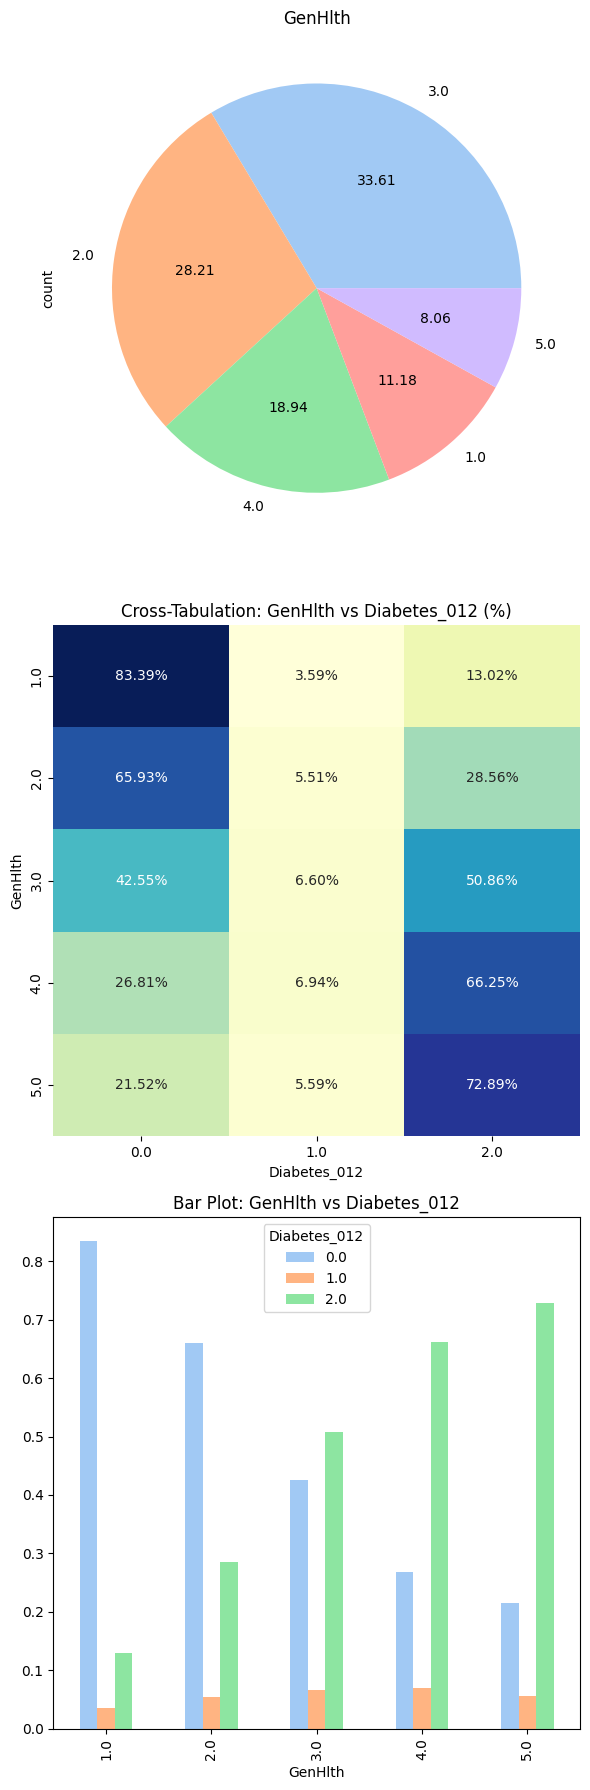

In [73]:
visualize_feature('GenHlth', df)

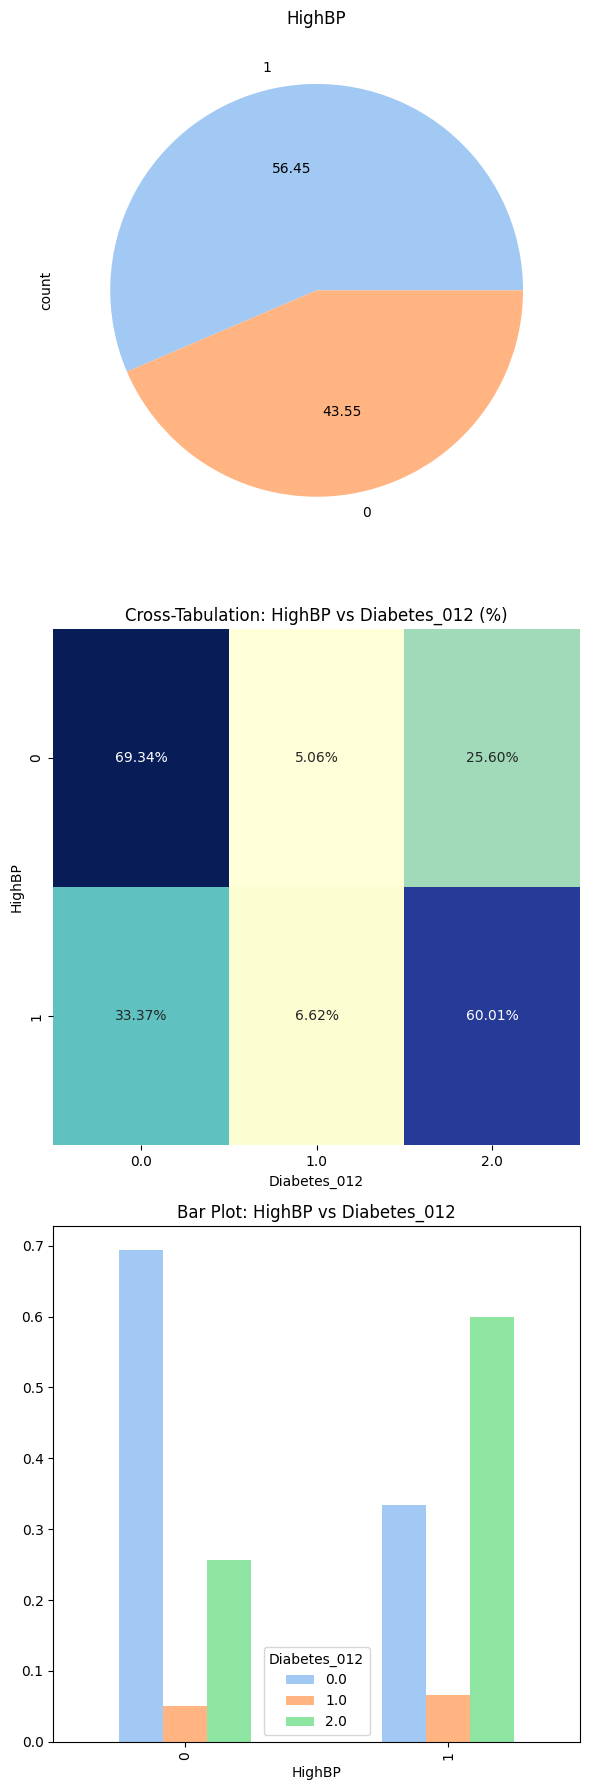

In [74]:
visualize_feature('HighBP', df)

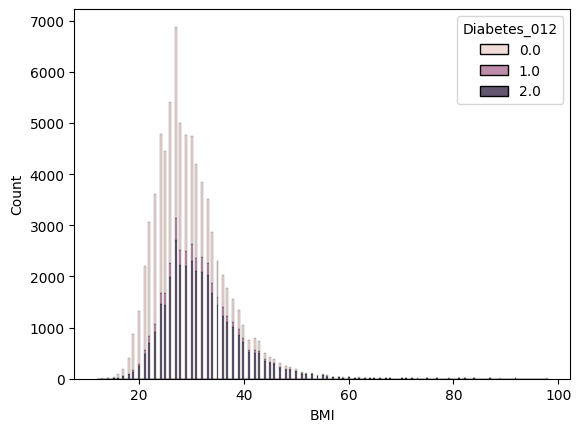

In [75]:
sns.histplot(df , x= df.BMI,hue=df.Diabetes_012 ,multiple='stack' );

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,77950.0,0.959885,0.969030,0.0,0.0,1.0,2.0,2.0
HighBP,77950.0,0.564490,0.495827,0.0,0.0,1.0,1.0,1.0
HighChol,77950.0,0.528005,0.499218,0.0,0.0,1.0,1.0,1.0
CholCheck,77950.0,0.973432,0.160819,0.0,1.0,1.0,1.0,1.0
BMI,77950.0,29.885888,7.147046,12.0,25.0,29.0,33.0,98.0
Smoker,77950.0,0.480103,0.499607,0.0,0.0,0.0,1.0,1.0
Stroke,77950.0,0.061552,0.240342,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,77950.0,0.146402,0.353511,0.0,0.0,0.0,0.0,1.0
AnyHealthcare,77950.0,0.952059,0.213643,0.0,1.0,1.0,1.0,1.0
NoDocbcCost,77950.0,0.097421,0.296533,0.0,0.0,0.0,0.0,1.0


In [77]:
df.corr()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
Diabetes_012,1.000000,0.360063,0.274715,0.118866,0.277441,0.074310,0.120935,0.203045,0.030308,0.035432,0.387349,0.084451,0.205721,0.260140,0.044214,0.265544
HighBP,0.360063,1.000000,0.301524,0.112792,0.225293,0.077968,0.125371,0.201278,0.038209,0.019568,0.304884,0.060318,0.166198,0.228867,0.037305,0.329625
HighChol,0.274715,0.301524,1.000000,0.094039,0.113882,0.087284,0.090203,0.173549,0.036585,0.023687,0.218238,0.079128,0.133545,0.154759,0.015949,0.235417
CholCheck,0.118866,0.112792,0.094039,1.000000,0.053538,0.002761,0.023391,0.045402,0.116018,-0.051716,0.071694,-0.003207,0.039275,0.049686,-0.014362,0.100982
BMI,0.277441,0.225293,0.113882,0.053538,1.000000,0.000534,0.019698,0.050950,-0.011346,0.058097,0.252698,0.103068,0.151402,0.234007,-0.005687,-0.050369
Smoker,0.074310,0.077968,0.087284,0.002761,0.000534,1.000000,0.059239,0.120873,-0.013564,0.033261,0.139770,0.087284,0.111062,0.110512,0.116641,0.096596
Stroke,0.120935,0.125371,0.090203,0.023391,0.019698,0.059239,1.000000,0.218723,0.006501,0.033224,0.184786,0.081586,0.158107,0.183920,0.000999,0.120762
HeartDiseaseorAttack,0.203045,0.201278,0.173549,0.045402,0.050950,0.120873,0.218723,1.000000,0.020911,0.032826,0.267808,0.074225,0.192807,0.228952,0.099494,0.221021
AnyHealthcare,0.030308,0.038209,0.036585,0.116018,-0.011346,-0.013564,0.006501,0.020911,1.000000,-0.233269,-0.033435,-0.055326,-0.007372,0.013420,-0.007545,0.142304
NoDocbcCost,0.035432,0.019568,0.023687,-0.051716,0.058097,0.033261,0.033224,0.032826,-0.233269,1.000000,0.162992,0.193883,0.157048,0.119361,-0.051387,-0.135149


In [78]:
from wolta.data_tools import expand_df

df = expand_df(df, 'Diabetes_012', 'not majority')

In [79]:
x=df.drop(columns=['Diabetes_012'])
y=df['Diabetes_012']

print(x.shape)
print(y.shape)

(114672, 15)
(114672,)


In [80]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [81]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
accuracies = []

for train_index, test_index in kfold.split(x, y):
  X_train, X_test = x[train_index], x[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index] # Use .iloc to index the Pandas Series

print(X_train.shape) # Use X_train instead of x_train
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(103205, 15)
(11467, 15)
(103205,)
(11467,)


In [82]:
model = SVC(kernel='rbf', gamma=1, C=1)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_predtrain = model.predict(X_train)

accuracy = accuracy_score(y_train, y_predtrain)
accuracies.append(accuracy)

print(classification_report(y_train, y_predtrain))
print("Akurasi SVM Training : {:.2f}%".format(accuracy*100))

In [ ]:
y_pred = model.predict(X_test)
accte = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Akurasi SVM Testing : {:.2f}%".format(accte*100)) # Use the 'acc' variable directly

In [ ]:
# prompt: save model in google drive

#import pickle
#from google.colab import drive
#drive.mount('/content/drive')
##filename = '/content/drive/MyDrive/DIABETOR LASTT/diabetes_model(0.1,1).sav'
#pickle.dump(model, open(filename, 'wb'))